In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

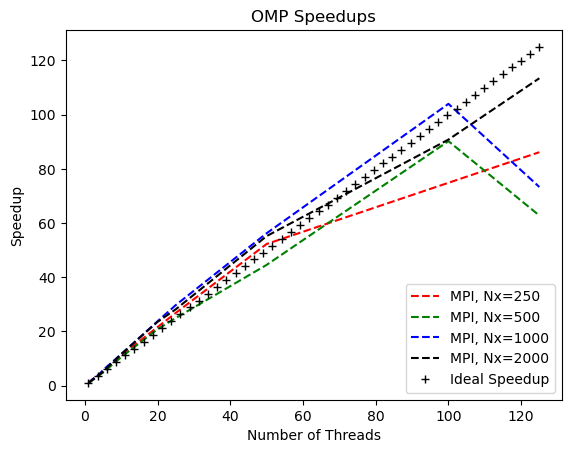

In [7]:
## Speedup graphs
threads250 = np.array([1, 2, 4, 8, 12, 16, 20, 24, 28])
ranks250 = np.array([1, 2, 5, 10, 25, 50, 125])
avg_times_omp250 = np.zeros(threads250.shape)
avg_times_mpi250 = np.zeros(ranks250.shape)
for i, n in enumerate(threads250):
    times = np.genfromtxt('output_omp/timer_vortex250_' + str(n) + ".csv", delimiter=',')
    avg_times_omp250[i] = times.mean()

for i, n in enumerate(ranks250):
    times = np.genfromtxt('output_mpi/timer_vortex250_' + str(n) + ".csv", delimiter=',')
    avg_times_mpi250[i] = times.mean()
    
threads500 = np.array([1, 2, 4, 8, 12, 16, 20, 24, 28, 32])
ranks500 = np.array([1, 2, 4, 5, 10, 20, 25, 50, 100, 125])
avg_times_omp500 = np.zeros(threads500.shape)
avg_times_mpi500 = np.zeros(ranks500.shape)
for i, n in enumerate(threads500):
    times = np.genfromtxt('output_omp/timer_vortex500_' + str(n) + ".csv", delimiter=',')
    avg_times_omp500[i] = times.mean()

for i, n in enumerate(ranks500):
    times = np.genfromtxt('output_mpi/timer_vortex500_' + str(n) + ".csv", delimiter=',')
    avg_times_mpi500[i] = times.mean()
    

threads1000 = np.array([1, 2, 4, 8, 12, 16, 20, 24, 28, 32])
ranks1000 = np.array([1, 2, 4, 5, 10, 20, 25, 50, 100, 125])
avg_times_omp1000 = np.zeros(threads1000.shape)
avg_times_mpi1000 = np.zeros(ranks1000.shape)
for i, n in enumerate(threads1000):
    times = np.genfromtxt('output_omp/timer_vortex1000_' + str(n) + ".csv", delimiter=',')
    avg_times_omp1000[i] = times.mean()

for i, n in enumerate(ranks1000):
    times = np.genfromtxt('output_mpi/timer_vortex1000_' + str(n) + ".csv", delimiter=',')
    avg_times_mpi1000[i] = times.mean()
    

threads2000 = np.array([1, 2, 4, 8, 12, 16, 20, 24, 28, 32])
ranks2000 = np.array([1, 2, 4, 5, 10, 20, 25, 50, 100, 125])
avg_times_omp2000 = np.zeros(threads2000.shape)
avg_times_mpi2000 = np.zeros(ranks2000.shape)
for i, n in enumerate(threads2000):
    times = np.genfromtxt('output_omp/timer_vortex2000_' + str(n) + ".csv", delimiter=',')
    avg_times_omp2000[i] = times.mean()

for i, n in enumerate(ranks2000):
    times = np.genfromtxt('output_mpi/timer_vortex2000_' + str(n) + ".csv", delimiter=',')
    avg_times_mpi2000[i] = times.mean()
    
avg_time_serial250 = np.genfromtxt('output_serial/timer_vortex250.csv', delimiter=',').mean()/1e9
avg_time_serial500 = np.genfromtxt('output_serial/timer_vortex500.csv', delimiter=',').mean()/1e9
avg_time_serial1000 = np.genfromtxt('output_serial/timer_vortex1000.csv', delimiter=',').mean()/1e9
avg_time_serial2000 = np.genfromtxt('output_serial/timer_vortex2000.csv', delimiter=',').mean()/1e9


# plt.plot(threads250,  avg_times_omp250[0]/avg_times_omp250, 'r-', label="OMP, Nx=250")
plt.plot(ranks250,    avg_times_mpi250[0]/avg_times_mpi250, 'r--', label="MPI, Nx=250")
# plt.plot(threads500,  avg_times_omp500[0]/avg_times_omp500, 'g-', label="OMP, Nx=500")
plt.plot(ranks500,    avg_times_mpi500[0]/avg_times_mpi500, 'g--', label="MPI, Nx=500")
# plt.plot(threads1000, avg_times_omp1000[0]/avg_times_omp1000, 'b-', label="OMP, Nx=1000")
plt.plot(ranks1000,   avg_times_mpi1000[0]/avg_times_mpi1000, 'b--', label="MPI, Nx=1000")
# plt.plot(threads2000, avg_times_omp2000[0]/avg_times_omp2000, 'k-', label="OMP, Nx=2000")
plt.plot(ranks2000,   avg_times_mpi2000[0]/avg_times_mpi2000, 'k--', label="MPI, Nx=2000")
plt.plot(np.linspace(1, 125), np.linspace(1,125), 'k+', label="Ideal Speedup")
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.title("OMP Speedups")
# plt.yscale("log")
plt.legend(loc='lower right')
plt.savefig("speedup_logy_mpi_sims.png")
plt.show()

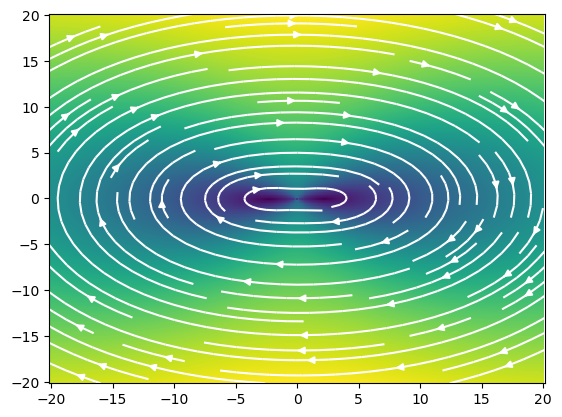

In [19]:
i = 300
input_dir = 'vortex500'
u = np.genfromtxt('output_mpi/u_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output_mpi/v_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output_mpi/Re_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
x = np.genfromtxt(input_dir + '/x.csv', delimiter=',')
y = np.genfromtxt(input_dir + '/y.csv', delimiter=',')
p = np.genfromtxt(input_dir + '/p.csv', delimiter=',')
gx = np.genfromtxt(input_dir + '/gx.csv', delimiter=',')
gy = np.genfromtxt(input_dir + '/gy.csv', delimiter=',')

X, Y = np.meshgrid(x, y)
plt.pcolor(x[2:-2], y[2:-2], Re[2:-2,2:-2], shading='auto')
plt.streamplot(X, Y, u, v, color='w')
plt.show()

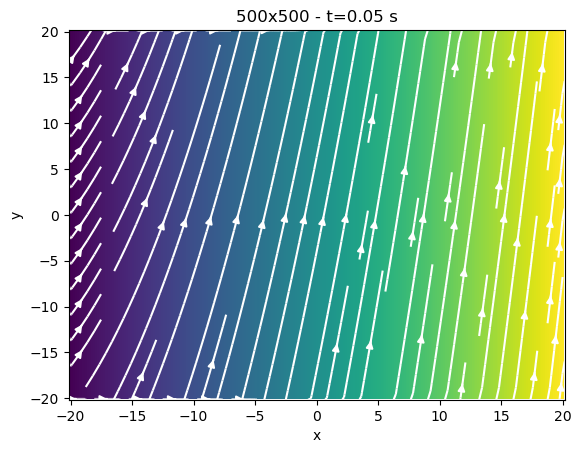

In [5]:
## Animate Serial Code
# Initialize variables
i_start = 0  # Start index
ie = 500  # End index
di = 10   # Step size
input_dir = 'laminar500'
fps = 6  # Frames per second

# Create a figure and an axes
fig, ax = plt.subplots()

# Animation update function
def update(i):
    ax.clear()  # Clear the plot to draw a new frame
    # Load data
    u = np.genfromtxt('output_serial/u_'+input_dir+f'_{i}.csv', delimiter=',')
    v = np.genfromtxt('output_serial/v_'+input_dir+f'_{i}.csv', delimiter=',')
    Re = np.genfromtxt('output_serial/Re_'+input_dir+f'_{i}.csv', delimiter=',')
    X, Y = np.meshgrid(x, y)

    # Create plots
    c = ax.pcolor(x[2:-2], y[2:-2], Re[2:-2,2:-2], shading='auto')
    ax.streamplot(X, Y, u, v, color='w')

    # Optional: Set plot limits, labels, titles
    ax.set_xlim([x.min(), x.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_title(f"500x500 - t={i*0.0001} s")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    return c,

# Preload x, y since they do not change
x = np.genfromtxt(input_dir + '/x.csv', delimiter=',')
y = np.genfromtxt(input_dir + '/y.csv', delimiter=',')

# Create animation
ani = FuncAnimation(fig, update, frames=range(i_start, ie + 1, di), blit=True)

# Save animation
ani.save('laminar_animation.mp4', writer='ffmpeg', fps=fps)

0.449002
0.449002


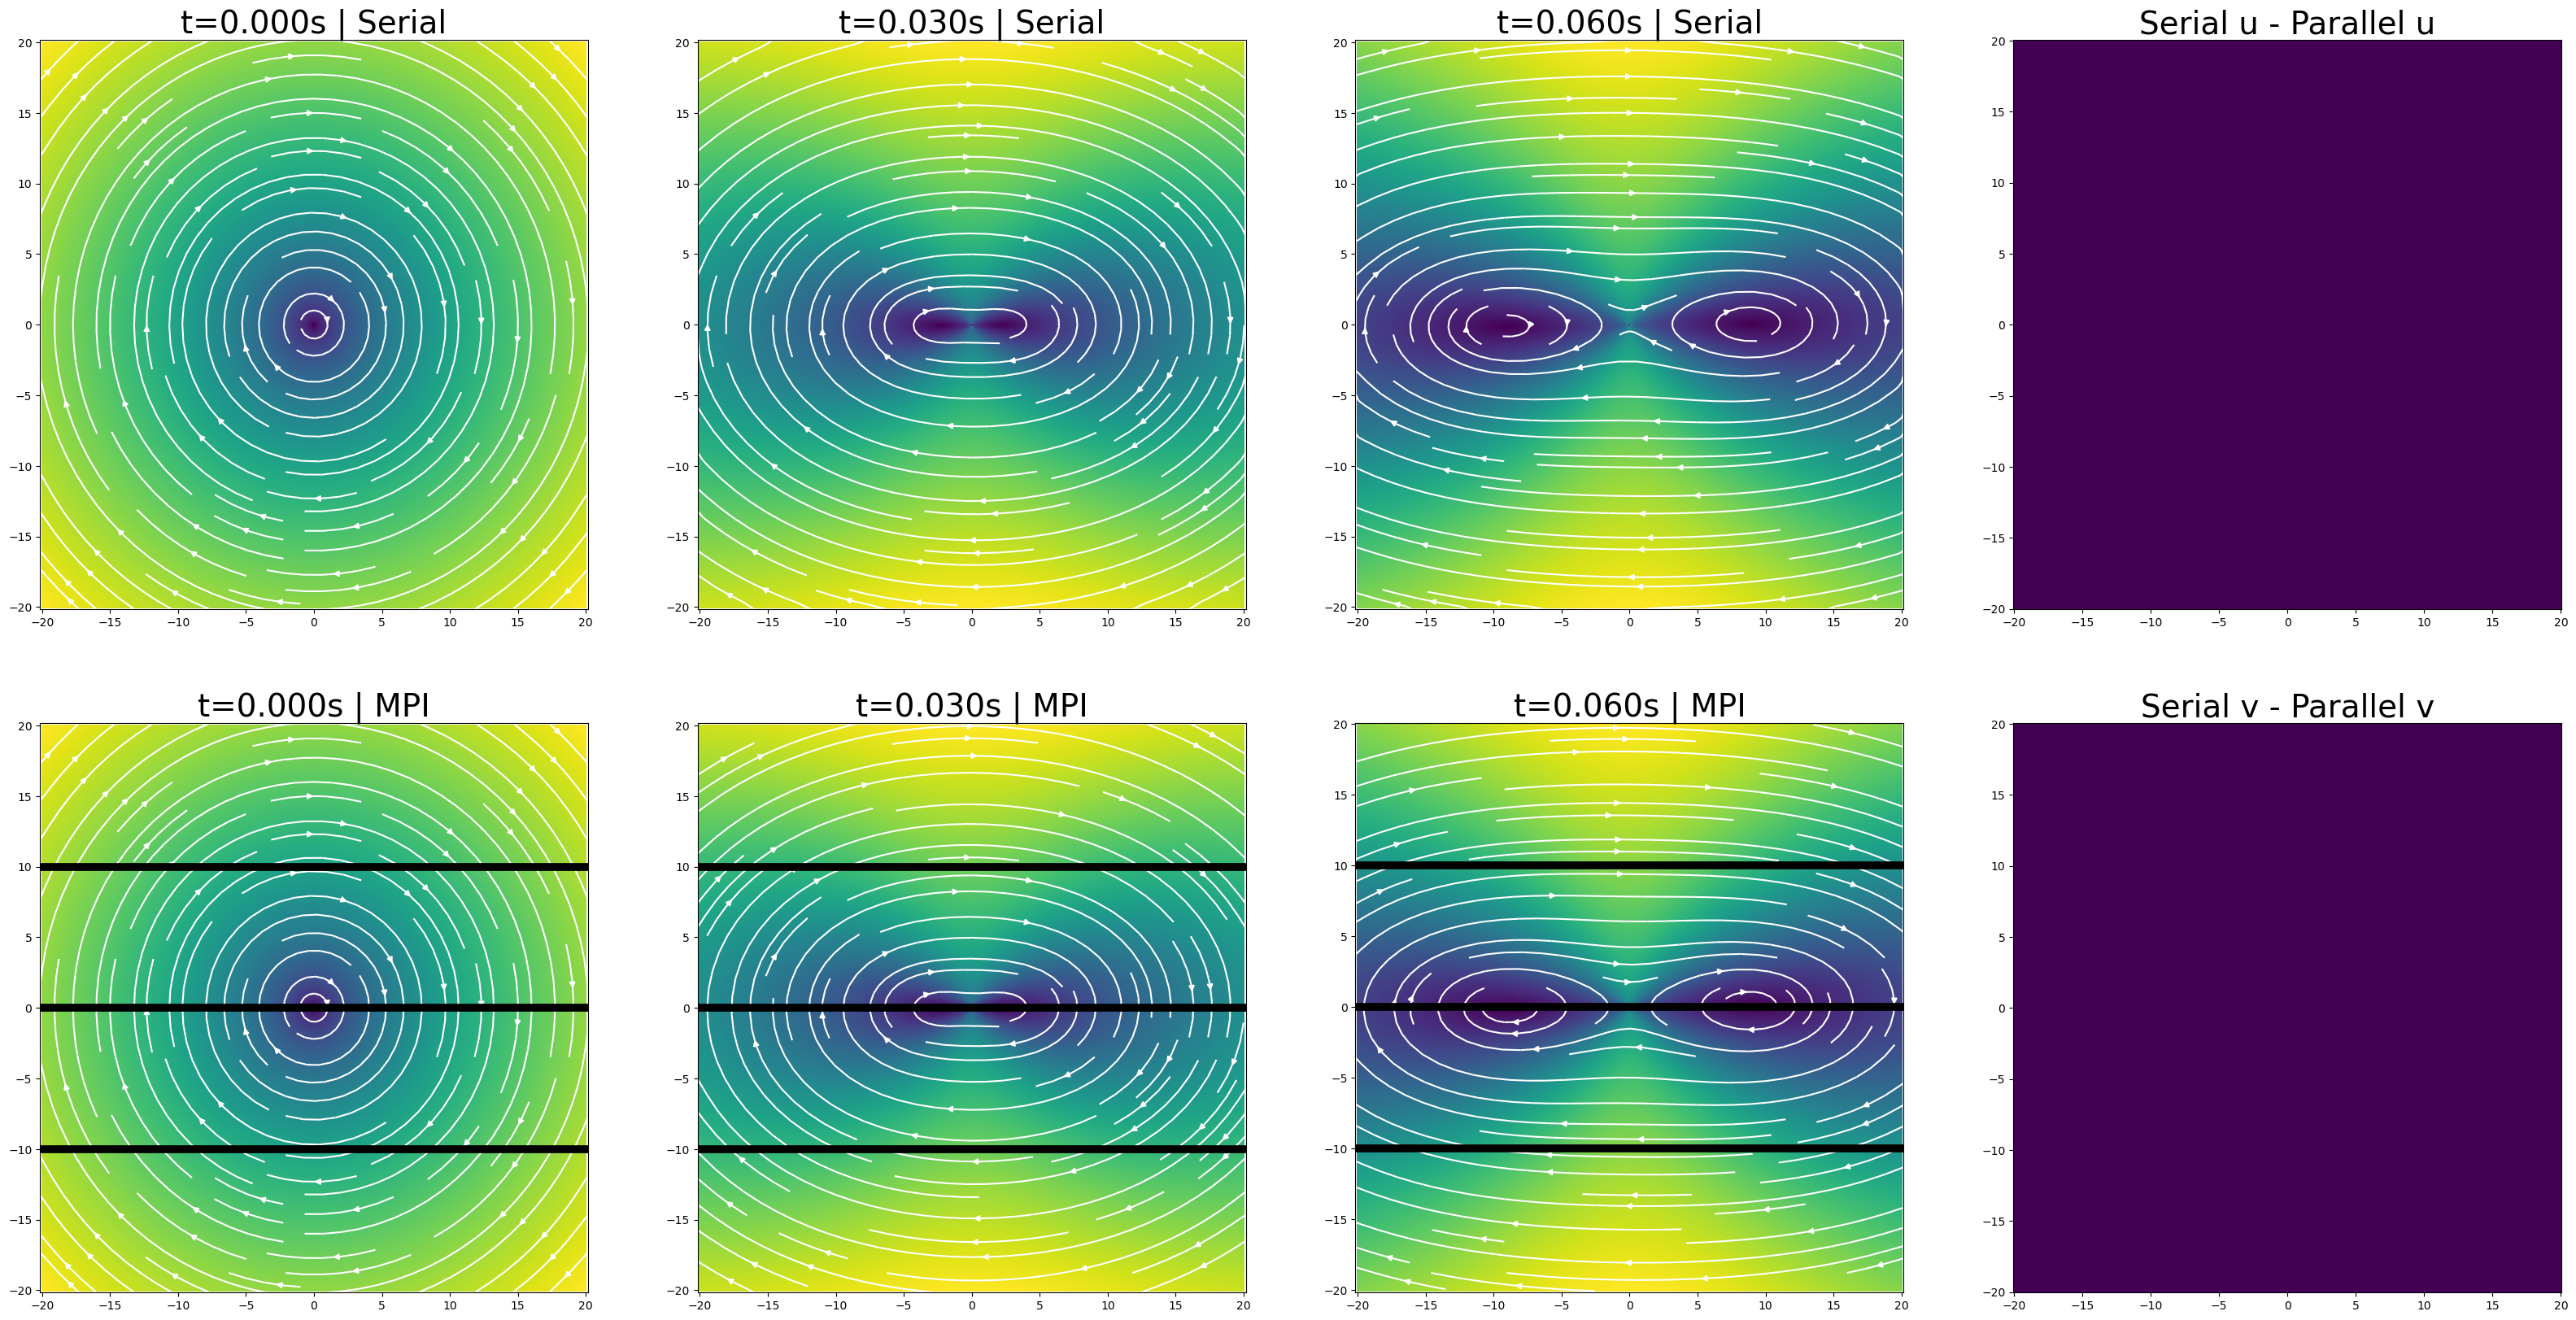

In [33]:
## Multiplot of parallel and serial code
output_dirs = ('output_serial', 'output_mpi')
input_dir = 'vortex500'
indices = [0, 300, 600]

fig, axs = plt.subplots(2, 4, figsize=(40, 20))  # Creating a 4x2 subplot array

i = indices[0]
x = np.genfromtxt(input_dir + '/x.csv', delimiter=',')
y = np.genfromtxt(input_dir + '/y.csv', delimiter=',')
X, Y = np.meshgrid(x, y)

u = np.genfromtxt('output_serial/u_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output_serial/v_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output_serial/Re_'+input_dir+'_'+str(i)+'.csv', delimiter=',')

axs[0, 0].pcolor(x[2:-2], y[2:-2], Re[2:-2, 2:-2], shading='auto')
axs[0, 0].streamplot(X, Y, u, v, color='w')
axs[0, 0].set_title("t=0.000s | Serial", fontsize=28)

i = indices[1]
u = np.genfromtxt('output_serial/u_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output_serial/v_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output_serial/Re_'+input_dir+'_'+str(i)+'.csv', delimiter=',')

axs[0, 1].pcolor(x[2:-2], y[2:-2], Re[2:-2, 2:-2], shading='auto')
axs[0, 1].streamplot(X, Y, u, v, color='w')
axs[0, 1].set_title("t=0.030s | Serial", fontsize=28)

i = indices[2]
u = np.genfromtxt('output_serial/u_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output_serial/v_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output_serial/Re_'+input_dir+'_'+str(i)+'.csv', delimiter=',')

axs[0, 2].pcolor(x[2:-2], y[2:-2], Re[2:-2, 2:-2], shading='auto')
axs[0, 2].streamplot(X, Y, u, v, color='w')
axs[0, 2].set_title("t=0.060s | Serial", fontsize=28)

###################################################################################

i = indices[0]
u = np.genfromtxt('output_mpi/u_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output_mpi/v_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output_serial/Re_'+input_dir+'_'+str(i)+'.csv', delimiter=',')

axs[1, 0].pcolor(x[2:-2], y[2:-2], Re[2:-2, 2:-2], shading='auto')
axs[1, 0].streamplot(X, Y, u, v, color='w')
axs[1, 0].set_title("t=0.000s | MPI", fontsize=28)
axs[1, 0].plot([-20, 20], [0, 0], linewidth=7.0, color='k')
axs[1, 0].plot([-20, 20], [10, 10], linewidth=7.0, color='k')
axs[1, 0].plot([-20, 20], [-10, -10], linewidth=7.0, color='k')

i = indices[1]
u = np.genfromtxt('output_mpi/u_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output_mpi/v_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output_mpi/Re_'+input_dir+'_'+str(i)+'.csv', delimiter=',')

axs[1, 1].pcolor(x[2:-2], y[2:-2], Re[2:-2, 2:-2], shading='auto')
axs[1, 1].streamplot(X, Y, u, v, color='w')
axs[1, 1].set_title("t=0.030s | MPI", fontsize=28)
axs[1, 1].plot([-20, 20], [0, 0], linewidth=7.0, color='k')
axs[1, 1].plot([-20, 20], [10, 10], linewidth=7.0, color='k')
axs[1, 1].plot([-20, 20], [-10, -10], linewidth=7.0, color='k')

i = indices[2]
u = np.genfromtxt('output_mpi/u_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output_mpi/v_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
Re = np.genfromtxt('output_mpi/Re_'+input_dir+'_'+str(i)+'.csv', delimiter=',')

axs[1, 2].pcolor(x[2:-2], y[2:-2], Re[2:-2, 2:-2], shading='auto')
axs[1, 2].streamplot(X, Y, u, v, color='w')
axs[1, 2].set_title("t=0.060s | MPI", fontsize=28)
axs[1, 2].plot([-20, 20], [0, 0], linewidth=7.0, color='k')
axs[1, 2].plot([-20, 20], [10, 10], linewidth=7.0, color='k')
axs[1, 2].plot([-20, 20], [-10, -10], linewidth=7.0, color='k')

###############################################################################
i = indices[2]
u1 = np.genfromtxt('output_serial/u_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
u2 = np.genfromtxt('output_mpi/u_'+input_dir+'_'+str(i)+'.csv', delimiter=',')

axs[0, 3].pcolor(x[2:-2], y[2:-2], u1[2:-2, 2:-2]-u2[2:-2, 2:-2], shading='auto')
axs[0, 3].set_title("Serial u - Parallel u", fontsize=28)

v1 = np.genfromtxt('output_serial/v_'+input_dir+'_'+str(i)+'.csv', delimiter=',')
v2 = np.genfromtxt('output_mpi/v_'+input_dir+'_'+str(i)+'.csv', delimiter=',')

axs[1, 3].pcolor(x[2:-2], y[2:-2], v1[2:-2, 2:-2]-v2[2:-2, 2:-2], shading='auto')
axs[1, 3].set_title("Serial v - Parallel v", fontsize=28)

print(np.max(u1-u2))
print(np.max(v1-v2))

fig.savefig("Time_Series_Plot.png")

In [51]:
np.max(u2[2:-2, 2:-2] - u1[2:-2, 2:-2])


0.0